In [1]:
from sklearn.datasets.samples_generator import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

C:\Anaconda3\envs\nlpiaenv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# prepare train and test dataset
def prepare_data():
    
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [3]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('opt='+optimizer, pad=-80)

In [4]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()

In [5]:
# create learning curves for different optimizers
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']

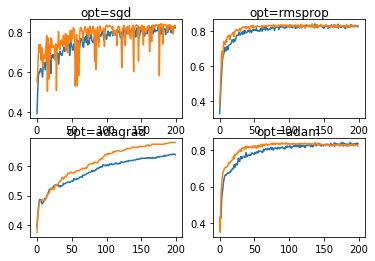

In [6]:
for i in range(len(optimizers)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for an optimizer
    fit_model(trainX, trainy, testX, testy, optimizers[i])
# show learning curves
pyplot.show()

In [ ]:
'''Again, we can see that SGD with a default learning rate of 0.01 and no momentum does
learn the problem, but requires nearly all 200 epochs and results in volatile accuracy on the
training data and much more so on the test dataset. The plots show that all three adaptive
learning rate methods learning the problem faster and with dramatically less volatility in train
and test set accuracy.'''

In [ ]:
'''Both RMSProp and Adam demonstrate similar performance, effectively learning the problem
within 50 training epochs and spending the remaining training time making very minor weight
updates'''